In [1]:
# useful additional packages 
import matplotlib.pyplot as plt
import matplotlib.axes as axes
%matplotlib inline
import numpy as np
import networkx as nx

from qiskit import Aer
from qiskit.aqua import QuantumInstance
from qiskit.circuit.library import TwoLocal, RealAmplitudes
from qiskit.tools.visualization import plot_histogram
from qiskit.optimization.applications.ising import tsp, max_cut
from qiskit.optimization.applications.ising.common import sample_most_likely
from qiskit.aqua.algorithms import VQE, NumPyEigensolver
from qiskit.aqua.components.optimizers import SPSA, COBYLA

#from qiskit import IBMQ
#provider = IBMQ.load_account()

distance
 [[ 0. 74. 65. 81.]
 [74.  0. 36. 51.]
 [65. 36.  0. 82.]
 [81. 51. 82.  0.]]


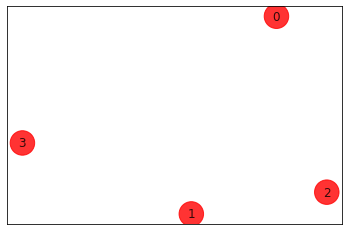

In [2]:
# Generating a graph of n nodes
n = 4

num_qubits = n ** 2
ins = tsp.random_tsp(n)
G = nx.Graph()
G.add_nodes_from(np.arange(0, n, 1))
colors = ['r' for node in G.nodes()]
pos = {k: v for k, v in enumerate(ins.coord)}
default_axes = plt.axes(frameon=True)
nx.draw_networkx(G, node_color=colors, node_size=600, alpha=.8, ax=default_axes, pos=pos)
print('distance\n', ins.w)

order = (0, 1, 2, 3) Distance = 273.0
order = (0, 1, 3, 2) Distance = 272.0
order = (0, 2, 1, 3) Distance = 233.0
Best order from brute force = (0, 2, 1, 3) with total distance = 233.0


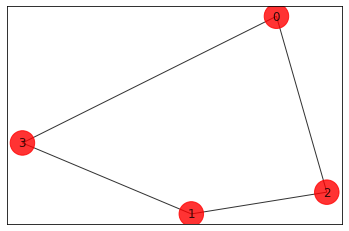

In [3]:
from itertools import permutations

def brute_force_tsp(w, N):
    a=list(permutations(range(1,N)))
    last_best_distance = 1e10
    for i in a:
        distance = 0
        pre_j = 0
        for j in i:
            distance = distance + w[j,pre_j]
            pre_j = j
        distance = distance + w[pre_j,0]
        order = (0,) + i
        if distance < last_best_distance:
            best_order = order
            last_best_distance = distance
            print('order = ' + str(order) + ' Distance = ' + str(distance))
    return last_best_distance, best_order
  
best_distance, best_order = brute_force_tsp(ins.w, ins.dim)
print('Best order from brute force = ' + str(best_order) + ' with total distance = ' + str(best_distance))

def draw_tsp_solution(G, order, colors, pos):
    G2 = G.copy()
    n = len(order)
    for i in range(n):
        j = (i + 1) % n
        G2.add_edge(order[i], order[j])
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G2, node_color=colors, node_size=600, alpha=.8, ax=default_axes, pos=pos)

draw_tsp_solution(G, best_order, colors, pos)

In [4]:
qubitOp, offset = tsp.get_operator(ins)

energy: [-1600545.+0.j]
tsp objective: [233.+0.j]
feasible: True
solution: [2, 0, 3, 1]
solution objective: 233.0


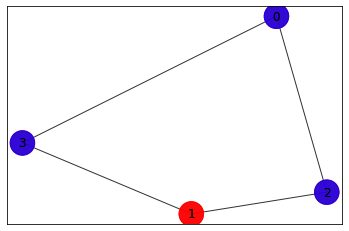

In [5]:
### Checking that the full Hamiltonian gives the right cost 
#Making the Hamiltonian in its full form and getting the lowest eigenvalue and eigenvector

from qiskit.aqua.algorithms import NumPyEigensolver
ee = NumPyEigensolver(qubitOp, k=1)
result = ee.run()

print('energy:', result['eigenvalues'])
print('tsp objective:', result['eigenvalues'] + offset)
x = sample_most_likely(result['eigenstates'][0])
print('feasible:', tsp.tsp_feasible(x))
z = tsp.get_tsp_solution(x)
print('solution:', z)
print('solution objective:', tsp.tsp_value(z, ins.w))
draw_tsp_solution(G, z, colors, pos)

colors = ['r' if tsp.get_tsp_solution(x)[i] == 0 else 'b' for i in range(n)]
nx.draw_networkx(G, node_color=colors, node_size=600, alpha = .8, pos=pos)

In [6]:
# Callback to print VQE iterations
def vqe_callback(count, params, mean, std):
    #print(count, params, mean, std)
    print(count, mean, std)

In [7]:
seed = 999

spsa = SPSA(max_trials=100)
#ry = TwoLocal(qubitOp.num_qubits, 'ry', 'cz', reps=5, entanglement='linear')
#ry = TwoLocal(qubitOp.num_qubits, 'ry', 'cz', reps=3, entanglement='full')
ry = RealAmplitudes(qubitOp.num_qubits, reps=3, entanglement='full')

vqe = VQE(qubitOp, ry, spsa, callback=vqe_callback)

backend = Aer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed)

result = vqe.run(quantum_instance)

print('energy:', result.eigenvalue.real)
print('time:', result.optimizer_time)
x = sample_most_likely(result.eigenstate)
print('feasible:', tsp.tsp_feasible(x))
z = tsp.get_tsp_solution(x)
print('solution:', z)
print('solution objective:', tsp.tsp_value(z, ins.w))
draw_tsp_solution(G, z, colors, pos)

/Users/sergiogago/opt/anaconda3/envs/qiskit24/lib/python3.8/site-packages/qiskit/aqua/components/optimizers/spsa.py:93: DeprecationWarning: The max_trials parameter is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use maxiter instead.
  warnings.warn('The max_trials parameter is deprecated as of '


1 -51406.155273437515 27676.74322714114
2 68563.7294921875 28674.868663106423
3 22636.9423828125 28429.07300425015
4 11713.279296875 28178.03530634972
5 41221.3271484375 28575.528037574833
6 -793.806640625 27802.083787062136
7 11715.6171875 26684.382891247726
8 -26787.55859375 27048.44293708341
9 22053.6162109375 28700.081363227662
10 -45940.4501953125 27417.207747208802
11 -88732.734375 27028.33973529196
12 13076.55078125 27987.711261993572
13 21286.4169921875 28398.730796762735
14 -73685.494140625 27324.344622605953
15 64841.841796875 27902.751954826228
16 -39093.84570312499 28155.175969884946
17 100234.79882812503 28549.05598329394
18 -60612.61523437503 26523.89914518093
19 -73301.478515625 27650.948374173113
20 83029.88574218753 27785.045637480616
21 65048.7314453125 29687.585920697707
22 -74464.5849609375 26854.575477536946
23 -38917.552734375 27974.91386126329
24 14655.645507812485 28799.18160492861
25 -10756.9130859375 26777.10978028496
26 22638.3740234375 29588.493986005113
27 

TypeError: unhashable type: 'list'

In [ ]:
plot_histogram(result.eigenstate)